<a href="https://colab.research.google.com/github/mohansameer1983/queens-mmai-869/blob/main/2022_869_SameerMohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- [Sameer, Mohan]
- [20309780]
- [Section-1]
- [Greenlight]
- [December 20, 2021]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [151]:
import datetime
import pandas as pd
import numpy as np

In [152]:
print(datetime.datetime.now())

2022-01-08 05:53:08.696529


In [153]:
!which python

/usr/local/bin/python


In [154]:
!python --version

Python 3.7.12


In [155]:
!echo $PYTHONPATH

/env/python


In [156]:
# TODO: install any packages you need to here. For example:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score,calinski_harabasz_score



# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [157]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [158]:
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


## 1.1: Clustering Algorithm #1

In [159]:
scaler = MinMaxScaler()
scaler.fit(df1)
X=scaler.transform(df1)

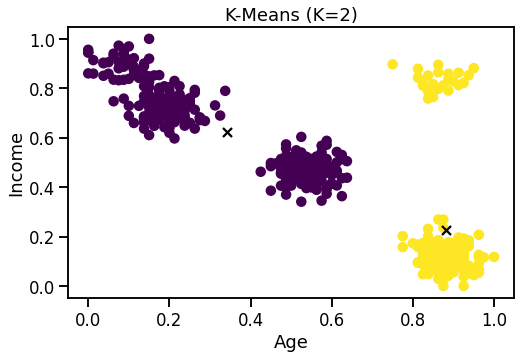

K=2, inertia=72.82, Sil=0.54, Cal_Har=528.79


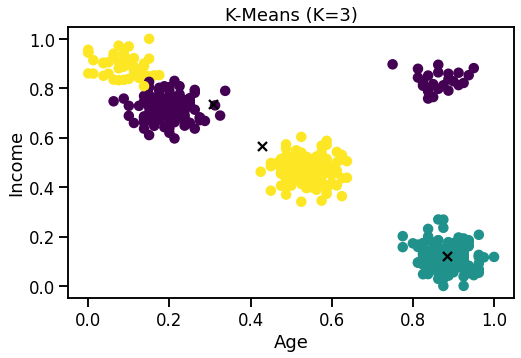

K=3, inertia=31.28, Sil=0.68, Cal_Har=947.44


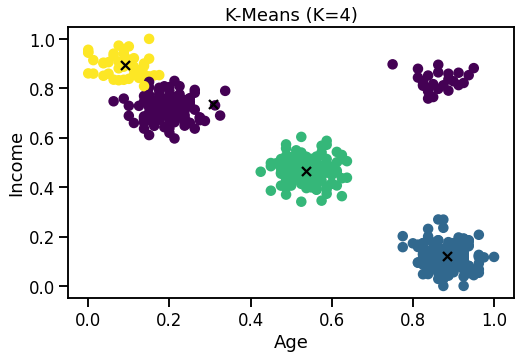

K=4, inertia=15.43, Sil=0.76, Cal_Har=1450.00


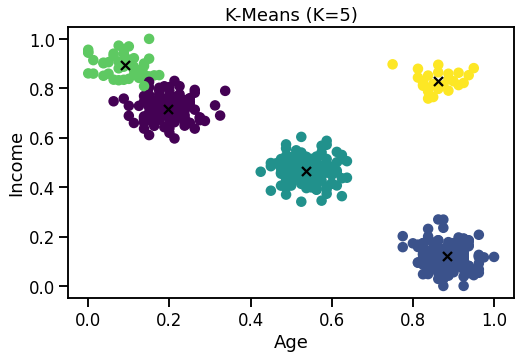

K=5, inertia=4.71, Sil=0.82, Cal_Har=3840.11


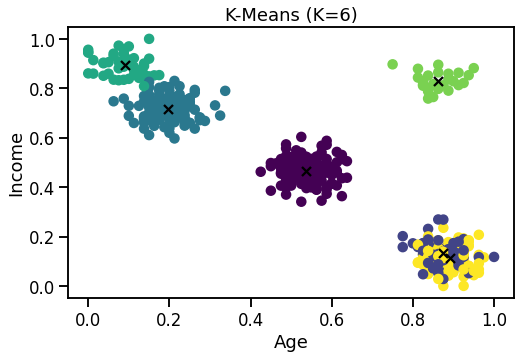

K=6, inertia=4.37, Sil=0.64, Cal_Har=3308.07


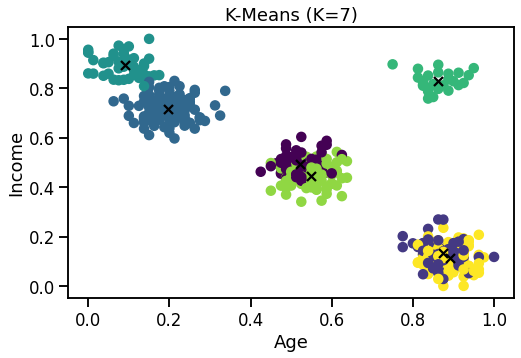

K=7, inertia=4.09, Sil=0.44, Cal_Har=2947.82


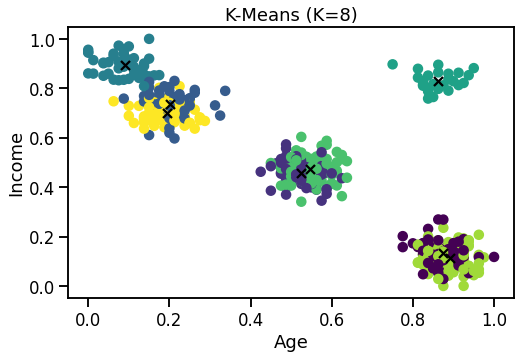

K=8, inertia=3.86, Sil=0.28, Cal_Har=2677.95


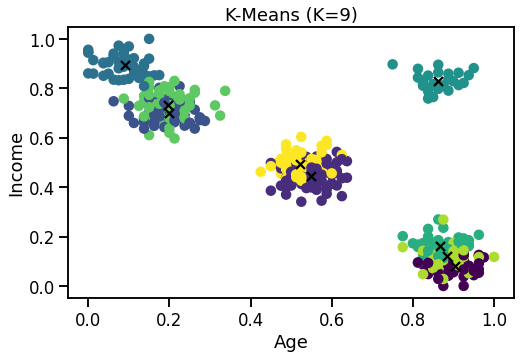

K=9, inertia=3.67, Sil=0.28, Cal_Har=2463.23


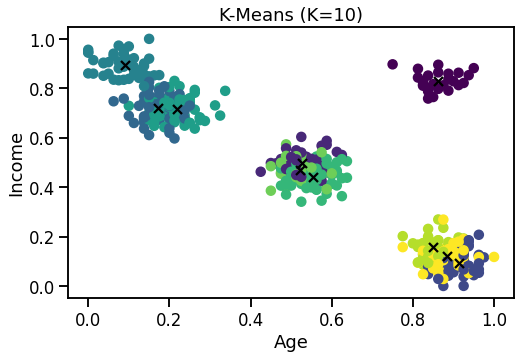

K=10, inertia=3.52, Sil=0.27, Cal_Har=2275.65


In [160]:
silhouette_scores = []
inertia = []
calinski_harabasz_scores = []

# candidate values for our number of cluster
parameters = [2,3,4,5,6,7,8,9,10]

def do_kmeans(X, k):
    global silhouette_scores
    global inertia
    global calinski_harabasz_scores

    #Run Kmeans algo with different cluster size
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10,tol=1e-04, random_state=42)
    k_means.fit(X)

    #Just to understand, visualize different cluster sizes with Age vs Income graph
    pyplot.figure(figsize=(8, 5))
    pyplot.scatter(X[:,0], X[:,1], c=k_means.labels_)
    pyplot.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    pyplot.title("K-Means (K={})".format(k));
    pyplot.xlabel('Age');
    pyplot.ylabel('Income');
    pyplot.show()

    #Calculate inertia for each model and append to global variable
    inertia_score = k_means.inertia_    
    inertia.append(inertia_score)

    #Calculate silhouette score for each model and append to global variable
    sil = silhouette_score(X, k_means.labels_)
    silhouette_scores += [sil]       # store all the scores

    #Calculate calinski_harabasz score for each model and append to global variable
    ch = calinski_harabasz_score(X, k_means.labels_)
    calinski_harabasz_scores += [ch]       # store all the scores

    print("K={}, inertia={:.2f}, Sil={:.2f}, Cal_Har={:.2f}".format(k, inertia_score, sil,ch))

for k in parameters:
    do_kmeans(X, k)


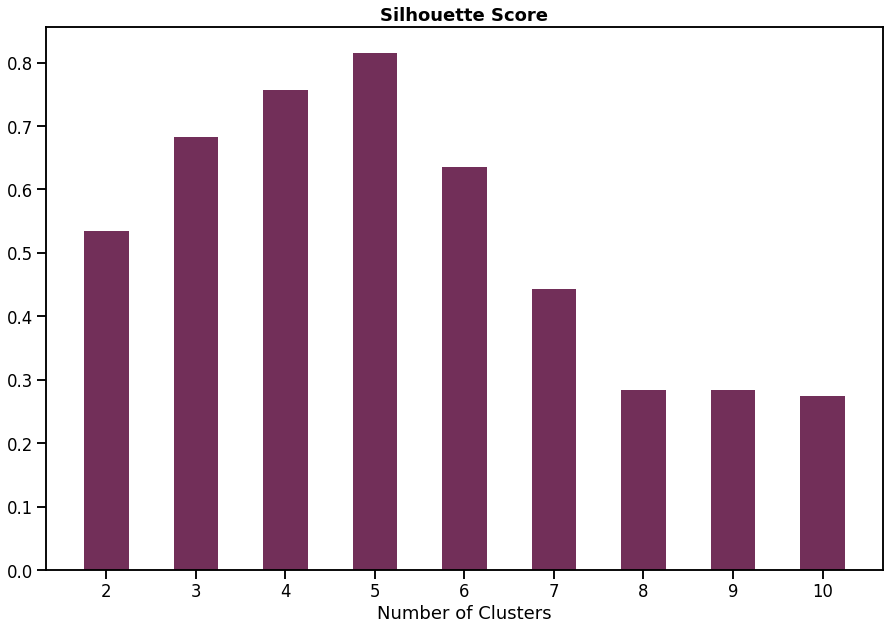

In [161]:
# plotting silhouette score
pyplot.figure(figsize=(15, 10))
pyplot.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
pyplot.xticks(range(len(silhouette_scores)), list(parameters))
pyplot.title('Silhouette Score', fontweight='bold')
pyplot.xlabel('Number of Clusters')
pyplot.show()

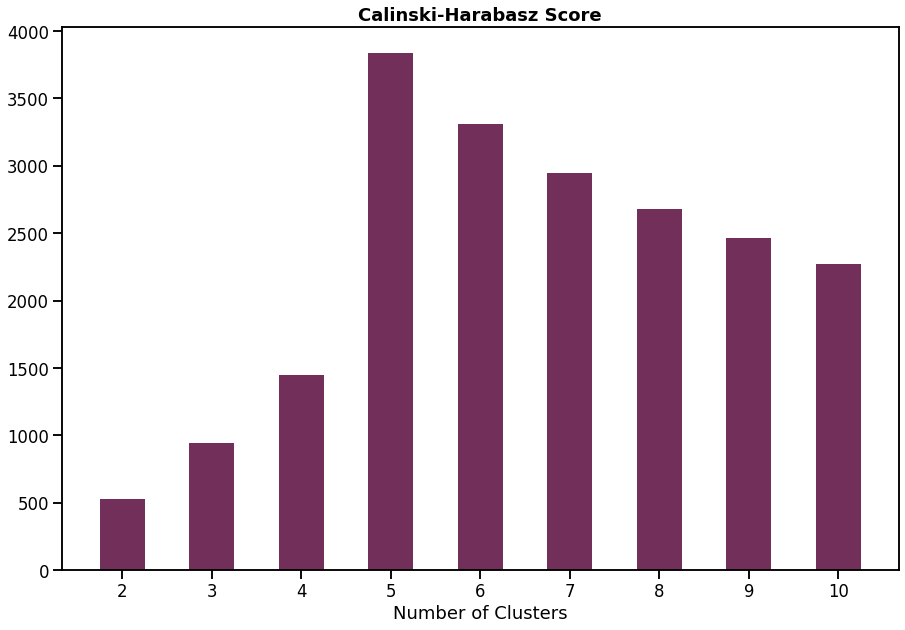

In [162]:
# plotting calinski_harabasz_scores
pyplot.figure(figsize=(15, 10))
pyplot.bar(range(len(calinski_harabasz_scores)), list(calinski_harabasz_scores), align='center', color='#722f59', width=0.5)
pyplot.xticks(range(len(calinski_harabasz_scores)), list(parameters))
pyplot.title('Calinski-Harabasz Score', fontweight='bold')
pyplot.xlabel('Number of Clusters')
pyplot.show()

In [163]:

fig = go.Figure(data=go.Scatter(x=np.arange(3,9),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[3,8],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=5,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=2,
            ax=20,
            ay=-40
        )
    ])

### Analysis -
We tried following methods to find out relevant numbers of clusters through K-Means Algorithm:

*   Hyperparameter Tuning - We tried different cluster sizes from 2-10. We visualize Age and Income values with respect to cluster label associated to them. And, its pretty visible that for cluster size '5', there is much better seperation between clusters.
*   Silhouette Score - For cluster size 5, Silhouette score is maximum at 0.82, which is good indication of proper intra and inter-cluster distances.
*   Calinski-Harabasz Score - This score is highest for Cluster size-5. This shows that clusters are better defined with this size.
* Elbow Method - On plotting Inertia score vs Cluster size, we can interpret that cluster size 5 is best value for hyperparameter 'n_clusters' in KMeans algo.

**Based, on above methods, we are going to use '5' as the cluster size for KMeans.**



In [164]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=10,tol=1e-04, random_state=42)
kmeans.fit(X)

# Creating dataframe with cluster labels 
df_clusters=pd.DataFrame(X,columns=df1.columns)

df_clusters['Cluster']=kmeans.labels_
df_clusters['Cluster'].value_counts()

2    157
1    147
0    126
3     50
4     25
Name: Cluster, dtype: int64

In [165]:
# Plotting Graph to visualize distribution of customers in different clusters
pie=df_clusters.groupby('Cluster').size().reset_index()
pie.columns=['Cluster','value']
px.pie(pie,title='Clusters Distribution, K-Means, K=5', values='value',names='Cluster',color=['blue','red','green','yellow','orange'])

## Model Interpretation

In [166]:
# We will attach cluster labels as new column in original dataset. Then, using groupBy cluster label and mean values of each feature, we can try to interpret behaviour of different customer groups.
df_clusters_orig=pd.DataFrame(df1.copy(),columns=df1.columns)
df_clusters_orig['Cluster']=kmeans.labels_
df_Cluster_Mean=df_clusters_orig.groupby("Cluster").mean().reset_index()
df_Cluster_Mean.head(20)

,Cluster,Age,Income,SpendingScore,Savings
0,0,32.777778,105265.809524,0.309926,14962.778066
1,1,87.775510,27866.102041,0.328800,16659.261445
2,2,59.955414,72448.063694,0.771518,6889.972190
3,3,24.180000,128029.120000,0.896892,4087.520309
4,4,86.000000,119944.040000,0.068378,14808.683793


In [167]:
# Converting *scaled* cluster dataframe into long format from wide format using Pandas melt, to visualize it better through Line Polar graph
# But, here we are going to use scaled dataset, instead of original one.
# Visualizing scaled data helped in balancing high values in feature like 'income', smaller values in 'Age' or 'Spending Score'.
# If we dont do that, it will result in bigger values completely eclipsing smaller values in charts below.

df_Cluster_Mean_Melt=df_clusters.groupby("Cluster").mean().reset_index()
df_Cluster_Mean_Melt=pd.melt(df_Cluster_Mean_Melt,id_vars=["Cluster"],
    var_name='Feature',
    value_name='Value')
df_Cluster_Mean_Melt.head(20)

,Cluster,Feature,Value
0,0,Age,0.197222
1,1,Age,0.884694
2,2,Age,0.536943
3,3,Age,0.089750
4,4,Age,0.862500
5,0,Income,0.717429
6,1,Income,0.122047
7,2,Income,0.464985
8,3,Income,0.892532
9,4,Income,0.830339


In [168]:
# Plotting Polar chart using Mean Feature values against each cluster, to describe customer groups
fig4 = px.line_polar(df_Cluster_Mean_Melt,title='Line Polar Plot, K-Means, K=5', 
                     r="Value", theta="Feature", color="Cluster", 
                     line_close=True,
                     height=800,width=1400, 
                     template="plotly_dark",)
fig4.show()

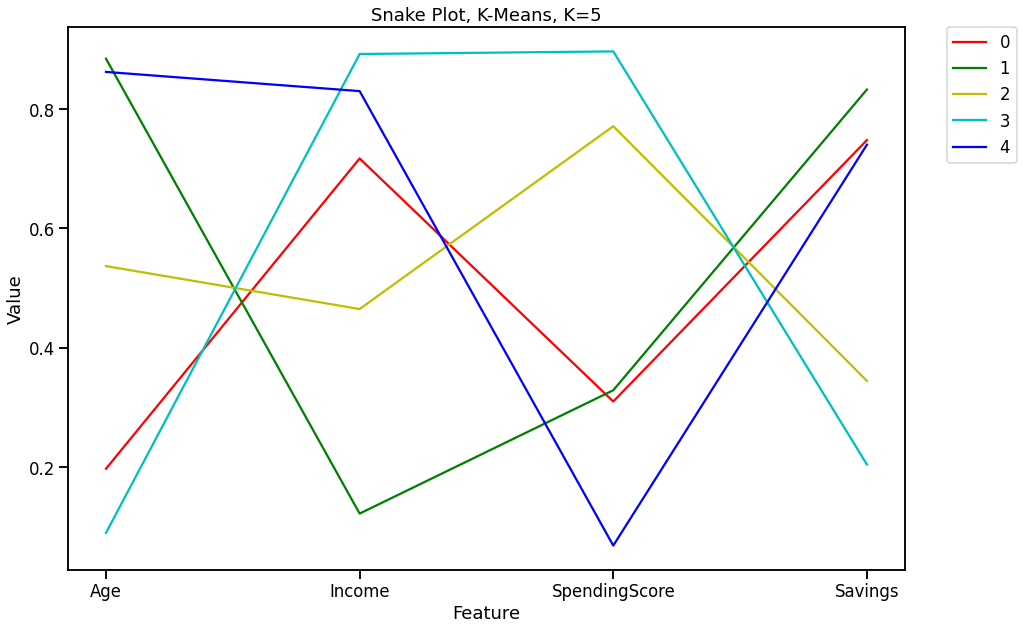

In [169]:
# Plotting Snake Plot graph using Mean Feature values against each cluster, to describe customer groups
pyplot.figure(figsize=(15, 10))
pyplot.title('Snake Plot, K-Means, K=5');
sns.set_context("talk");
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=df_Cluster_Mean_Melt, legend="full",palette=['r', 'g','y','c','b'] );
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## 1.2: Clustering Algorithm #2

eps=0.09, min_samples=7, n_clusters=6, sil=0.7865508787829819


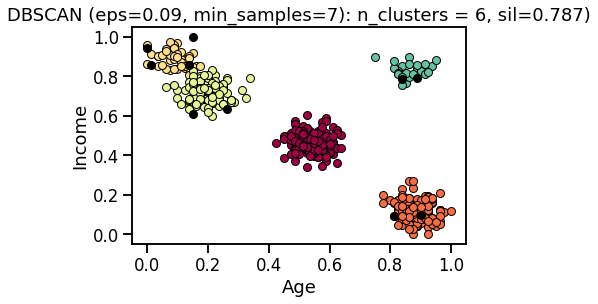

eps=0.1, min_samples=8, n_clusters=6, sil=0.807053637580285


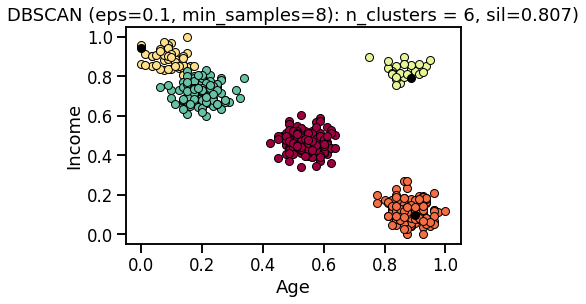

eps=0.13, min_samples=8, n_clusters=5, sil=0.8156911152768872


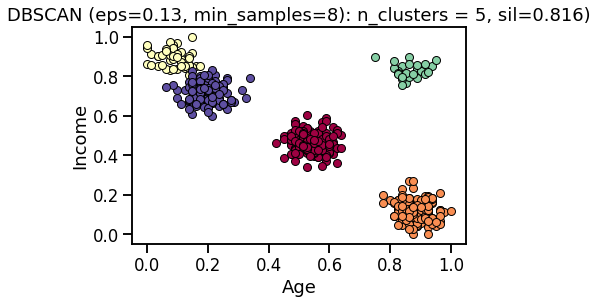

eps=0.14, min_samples=7, n_clusters=5, sil=0.8156911152768872


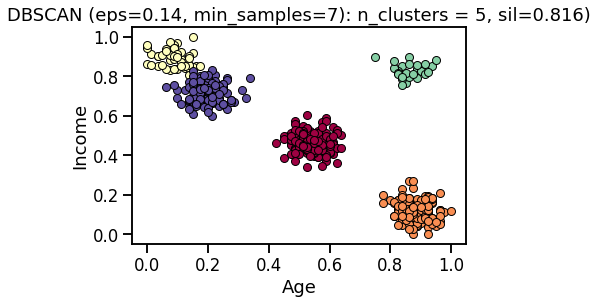

eps=0.12, min_samples=7, n_clusters=6, sil=0.7816868884447269


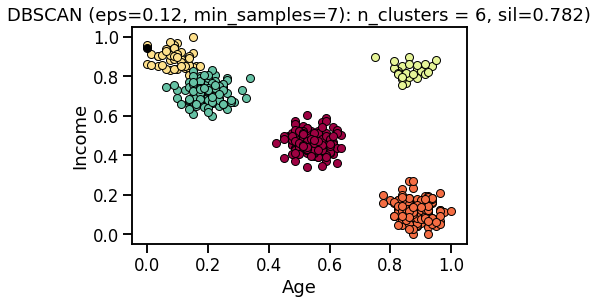

eps=0.36, min_samples=8, n_clusters=5, sil=0.8156911152768872


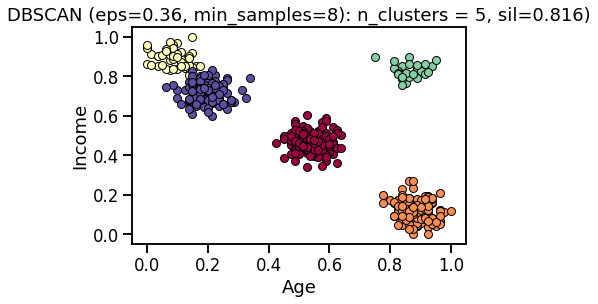

In [170]:
# We can leverage function from Uncle Steve's github code to test different hyperparameters for DBSCAN
# For DBSCAN, eps and min_samples are the only two params which are important to tune.

def do_and_plot_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) 
    
    if n_clusters <= 1:
        sil = -1
    else:
        sil = silhouette_score(X, db.labels_)
    
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    pyplot.figure();
    
    colors = [pyplot.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:        # Black used for noise.
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        xy = X[db.labels_ == k]
        pyplot.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8);


    pyplot.title('');
    pyplot.title("DBSCAN (eps={}, min_samples={}): n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil));
    pyplot.xlabel('Age');
    pyplot.ylabel('Income');
    pyplot.show()


do_and_plot_dbscan(X, 0.09, 7)
do_and_plot_dbscan(X, 0.1, 8)
do_and_plot_dbscan(X, 0.13, 8)
do_and_plot_dbscan(X, 0.14, 7)
do_and_plot_dbscan(X, 0.12, 7)
do_and_plot_dbscan(X, 0.36, 8)

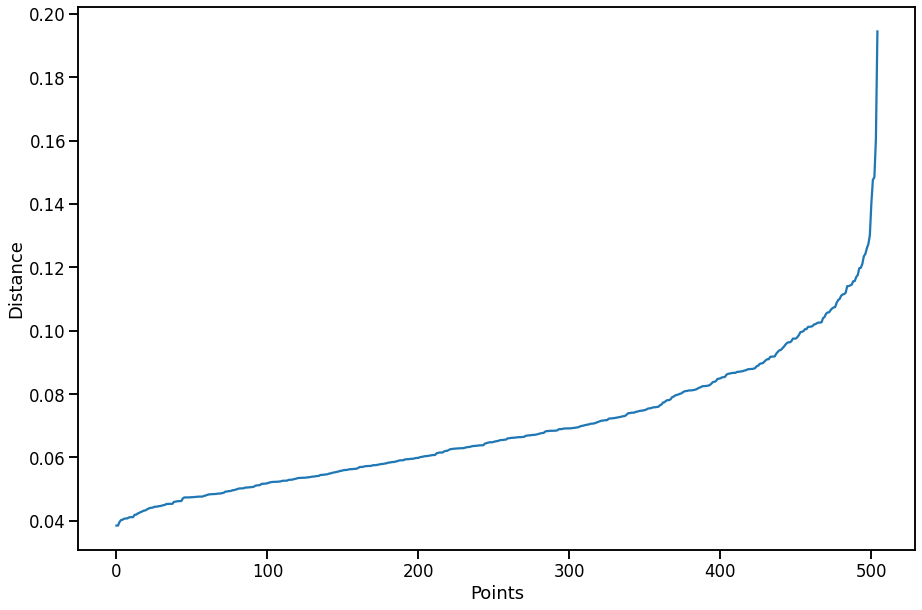

In [171]:
# We can use NearestNeighbours (Knee Method) to decide Eps value for DBSCAN hyperparameter
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=9)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,8], axis=0)
fig = pyplot.figure(figsize=(15, 10))
pyplot.plot(distances)
pyplot.xlabel("Points")
pyplot.ylabel("Distance")
pyplot.savefig("Distance_curve.png", dpi=300)

In [172]:
# From above parameter exploration and elbow method using nearestneighbour, we can conclude that eps=0.13 and min_samples=8 will give best silhouette scores with 5 clusters
db = DBSCAN(eps=0.13, min_samples=8).fit(X)
labels = db.labels_
print('labels: ', labels)

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
sil=silhouette_score(X, db.labels_)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print('DBSCAN Silhouette Score-',sil)

labels:  [0 0 0 0 1 2 0 1 1 1 3 4 4 4 0 3 0 1 1 3 4 3 0 1 3 2 2 0 1 0 0 0 1 0 4 0 1
 0 4 4 0 1 2 0 0 2 3 2 4 0 1 4 2 1 0 1 4 1 1 1 1 1 1 0 0 0 1 2 2 0 0 4 1 1
 4 0 4 0 0 2 0 3 0 1 1 4 4 0 0 0 0 0 2 1 0 2 4 0 0 4 4 2 4 2 4 1 1 4 4 0 1
 4 0 4 4 4 0 4 2 1 4 1 1 1 4 3 0 1 0 0 4 0 4 0 2 1 3 2 0 4 1 0 0 2 0 2 0 3
 0 1 0 4 1 0 1 3 4 0 1 0 4 1 0 4 1 4 1 0 4 0 1 0 4 0 1 0 0 1 1 1 0 0 4 2 2
 1 4 0 0 0 4 1 0 0 0 1 2 4 1 1 1 4 0 4 0 4 0 1 2 0 1 1 1 1 0 1 4 2 4 1 0 0
 4 1 4 2 4 0 0 1 0 0 1 0 0 0 4 0 4 4 2 0 0 0 3 0 4 1 2 2 2 1 0 4 1 1 4 4 0
 0 3 0 0 1 0 1 4 2 0 4 1 0 1 1 4 0 1 1 0 0 1 4 4 3 4 1 1 4 3 1 1 2 0 4 4 0
 4 1 1 4 0 4 1 0 4 2 0 1 4 4 1 3 3 0 1 4 0 0 1 4 1 4 1 4 1 1 4 1 4 0 4 0 0
 4 4 1 1 2 2 4 1 2 1 3 0 0 0 1 1 4 4 3 4 3 0 4 2 1 0 1 2 0 1 1 0 1 4 0 3 4
 4 0 1 1 1 1 1 4 4 1 0 4 0 3 1 1 0 1 1 0 1 1 4 1 0 4 2 4 0 1 4 0 0 0 1 4 2
 4 0 4 0 0 2 4 3 2 4 4 1 0 1 4 1 4 0 0 1 3 4 1 4 0 0 4 0 1 0 4 0 1 0 1 2 4
 4 2 4 4 1 1 0 2 0 4 4 3 2 4 2 1 4 4 0 4 1 1 2 0 4 0 0 4 0 0 0 1 4 4 0 0 0
 1 4 1 1 1 1 2 1

In [173]:
# We will attach cluster labels as new column in original dataset. Then, using groupBy cluster label and mean values of each feature, we can try to interpret behaviour of different customer groups.
df_db_clusters=pd.DataFrame(df1.copy(),columns=df1.columns)
df_db_clusters['Cluster']=db.labels_
df_db_clusters_Mean=df_db_clusters.groupby("Cluster").mean().reset_index()
df_db_clusters_Mean.head(5)

,Cluster,Age,Income,SpendingScore,Savings
0,0,59.955414,72448.063694,0.771518,6889.972190
1,1,87.775510,27866.102041,0.328800,16659.261445
2,2,24.180000,128029.120000,0.896892,4087.520309
3,3,86.000000,119944.040000,0.068378,14808.683793
4,4,32.777778,105265.809524,0.309926,14962.778066


In [174]:
# Plotting Graph to visualize distribution of customers in different clusters
pie=df_db_clusters.groupby('Cluster').size().reset_index()
pie.columns=['Cluster','value']
px.pie(pie,title='Clusters Distribution, DBSCAN', values='value',names='Cluster',color=['blue','red','green','yellow','orange'])

In [175]:
# Using scaled data to visualize clusters after using Melt method
 
df_db_scaled_clusters=pd.DataFrame(X,columns=df1.columns)

df_db_scaled_clusters['Cluster']=db.labels_
df_db_scaled_clusters_Mean_Melt=df_db_scaled_clusters.groupby("Cluster").mean().reset_index()
df_db_scaled_clusters_Mean_Melt=pd.melt(df_db_scaled_clusters_Mean_Melt,id_vars=["Cluster"],
    var_name='Feature',
    value_name='Value')
df_db_scaled_clusters_Mean_Melt.head(20)

,Cluster,Feature,Value
0,0,Age,0.536943
1,1,Age,0.884694
2,2,Age,0.089750
3,3,Age,0.862500
4,4,Age,0.197222
5,0,Income,0.464985
6,1,Income,0.122047
7,2,Income,0.892532
8,3,Income,0.830339
9,4,Income,0.717429


In [176]:
# Plotting Polar chart using Mean Feature values against each cluster, to describe customer groups
fig4 = px.line_polar(df_db_scaled_clusters_Mean_Melt,title='Line Polar Plot, DBSCAN', 
                     r="Value", theta="Feature", color="Cluster", 
                     line_close=True,
                     height=800,width=1400, 
                     template="plotly_dark",)
fig4.show()

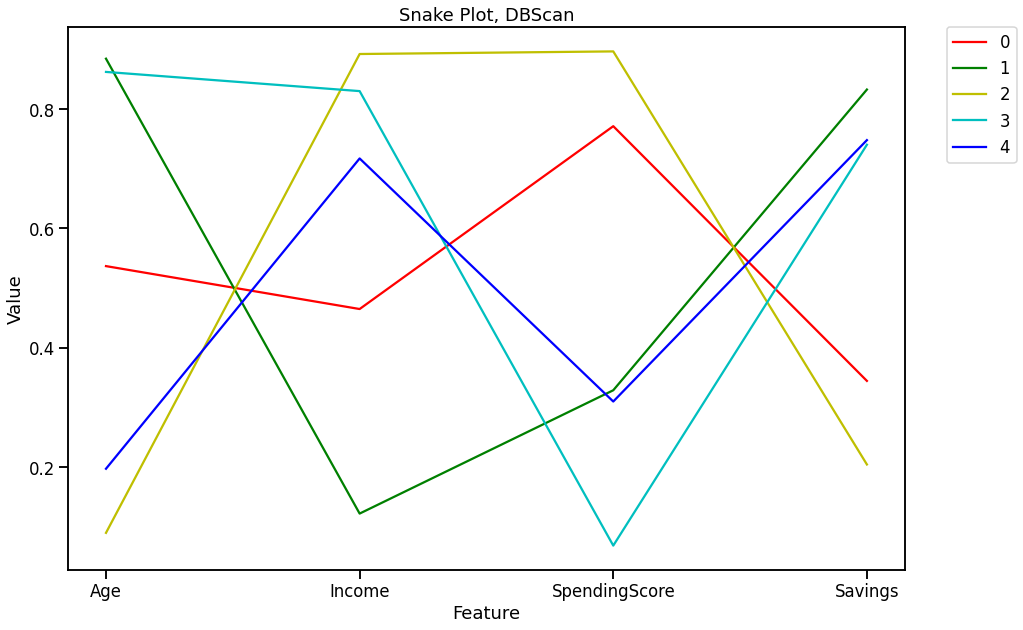

In [177]:
# Plotting Snake Plot graph using Mean Feature values against each cluster, to describe customer groups
pyplot.figure(figsize=(15, 10))
pyplot.title('Snake Plot, DBScan');
sns.set_context("talk");
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=df_db_scaled_clusters_Mean_Melt, legend="full",palette=['r', 'g','y','c','b'] );
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## 1.3 Model Comparison

On very high level, both algorithms worked in same way. Both indicated presence of 5 clusters in dataset. Silhouette score of both algorithms is around 0.81-0.82.

DBScan don't needs us to specify number of clusters in advance. But, we have to carefully choose the eps and min_samples values, or we will not get clear cluster regions, with many noise points.
I don't see any difference in ease of use between two algorithms. Both looks easy. May be dataset is not that complex.

Cluster labels generated by both methods are almost same for each row in dataset.

If still I have to pick one, I would go with DBSCAN. Its very easy to just start using it, without considering minimum clusters as hyperparameter.

## 1.4 Personas

In above two algorithms, we calculated mean values for each feature by Cluster label. Fortunately, both algos gave same result. So, we can now try to establish customer personas.

1.  Cluster 0 - [Age - 32;	Income-105,265.00; Spending Score - 0.30; Savings - 	14,962.00] - 25%

**Persona => Frugal spending/Discount Lover -** This is a group of young customers with good income and savings. From average spending score, looks like they remain within budget and thought carefully before buying anything. In given dataset, they represent 25% of total population.
Uncle Steve Should target them with marketing campaign, which can convince them that its worth to buy diamonds from his shop, and they will get good side deals with it.
2.  Cluster 1 - [Age - 87;	Income-27,866.00; Spending Score - 0.32; Savings - 	16,659.00] - 29%

**Persona => Frugal spending/Discount Lover -** Old customers group with very low income. They have high savings, which shows that this group may belong to retirees. Spending score is pretty average, which shows that they take very good care to keep their buying habits in check, due to limited income.
Uncle Steve may offer cheaper products at good prices, like small earings or pendants.

3.  Cluster 2 - [Age - 59;	Income-72,448.00; Spending Score - 0.77; Savings - 	6,889.00] - 31.1%

**Persona => spendthrift**- Average age group with limited income. They are the ones with very high spending scores, so our primary targets. But, considering their low income, they may not interested in high end diamond products. 

4.  Cluster 3 - [Age - 24;	Income-128,029.00; Spending Score - 0.89; Savings - 	4,087.00] - 9.9%

**Persona => Spendthrift**- Young group with highest income is all groups. Very high spenders and limited savings. This is the premium group we are looking for. Due to age factor and good money, this group may prefer luxury items and brand value. Uncle Steve should put most of the marketing effort on this group.

5.  Cluster 4 - [Age - 86;	Income-119,944.00; Spending Score - 0.06; Savings - 	14,808.00] - 4.95%

**Persona =>  Cheapskate**- Worst of all consumer types. This group consists of high networth old age individuals, with good savings and income. But, they don't spend money even if they need something. Uncle Steve should not put any effort on this group marketing.


# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

 `{Soda} -> {Chips}`
Soda and chips are one of the most commonly bought items in most of the households. This means high percentage of transactions would have them, which indicates high support. Its most likely that if someone is buying soda, they will buy chips, which indicates high confidence. But, this rule is quite obvious and would not much interesting to uncle Steve, as many transactions consists of this combination.

## 2.2: A rule that might have reasonably high support but low confidence.

`{Greeting Cards} -> {Flowers}`
Its most likely for gifts section, people tend to buy greeting cards and flowers very often. This is the no brainer option for people who want to keep gifts simple and under budget. But, customer can buy cards for different occasions, without buying flowers. This indicates comparatively lower confidence.
I think uncle Steve would not be much interested in this rule.

## 2.3: A rule that might have low support and low confidence.

`{fish} -> {hair goo}`
Customer generally don't buy these items together or are not that common for every household to buy. This is low support. Definitely, these items not purchases together, so low on confidence. 
I think this rule is again would not be of interest to uncle Steve.

## 2.4: A rule that might have low support and high confidence.

`{Toothpaste} -> {Shampoo}`
Generally, these two items are not frequently bought as frequent items in monthly grocery. People would buy them may be once in two months or so. So, in overall transactions, lower presence of these items, which indicates low support. But, these two items generally bought together, because of nature of their usage pattern, which shows high confidence.
This rule could be of higher interest to uncle Steve.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [178]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [179]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler 

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [180]:
X_train.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27


In [181]:
X_train.nunique()

UserID               4800
Sex                     2
PreviousDefault         2
FirstName             568
LastName              907
NumberPets              3
PreviousAccounts        7
ResidenceDuration      10
Street               4800
LicensePlate         4799
Amount               1641
Married                 2
Duration                6
City                   20
Purpose                 8
DateOfBirth          3570
dtype: int64

In [182]:
X_train_1 = X_train.drop(['UserID','FirstName','LastName','Street','LicensePlate','DateOfBirth'],axis=1)
X_train_mod = pd.get_dummies(X_train_1, prefix=['Sex','City','Purpose'])


In [183]:
# Fitting Random Forest Classification to the Training set
rf = RandomForestClassifier()
rf.fit(X_train_mod, y_train)

rf_score = cross_val_score(rf, X_train_mod, y_train, scoring='roc_auc', cv=6, n_jobs=-1)
print('rf_score-',rf_score)
print("Mean Score of Base Model: %0.2f (+/- %0.2f)" % (rf_score.mean(), rf_score.std() * 2))

rf_score- [0.82615517 0.80623355 0.82498816 0.83797382 0.8230056  0.81219624]
Mean Score of Base Model: 0.82 (+/- 0.02)



## 3.2: Feature engineering

In [184]:
# Adding new feature - 'Age' from 'Date of Birth'
X_train_2 = X_train.copy()
now = datetime.today().strftime('%Y-%m-%d')

X_train_2['DateOfBirth'] = pd.to_datetime(X_train_2['DateOfBirth'], format='%Y-%m-%d')


X_train_2["Age"] = (pd.datetime.today().year - X_train_2['DateOfBirth'].dt.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [185]:
# Adding new feature - Log of Amount column 
X_train_2['log_amount'] = np.log(X_train_2['Amount'])

In [186]:
# Adding new feature - Amount/Duration Ratio
X_train_2['Amount_Duration_ratio'] = X_train_2['Amount']/X_train_2['Duration']

In [187]:
# As numbers of records are low for Purpose 'Businees', we are adding it into 'Other' purpose
purpose_categories = {'NewCar':'NewCar', 'UsedCar':'UsedCar', 
                    'Household':'Household', 'Vacation':'Vacation',
                    'Repair':'Repair', 'Education':'Education', 'Business':'Other', 'Other':'Other'}
X_train_2['Purpose'] = [purpose_categories[x] for x in X_train_2['Purpose']]
X_train_2['Purpose'].value_counts()

NewCar       1455
UsedCar      1102
Other         809
Household     478
Vacation      350
Repair        348
Education     258
Name: Purpose, dtype: int64

In [188]:
X_train_2.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,Age,log_amount,Amount_Duration_ratio
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22,52,8.110427,277.416667
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19,58,8.005033,83.222222
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17,47,7.811973,102.916667
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16,45,8.228177,124.833333
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27,46,8.174421,98.583333


In [189]:
X_train_3 = X_train_2.drop(['UserID','FirstName','LastName','Street','LicensePlate','DateOfBirth','Amount','Duration'],axis=1)
X_train_mod_2 = pd.get_dummies(X_train_3, prefix=['Sex','City','Purpose'])
X_train_3.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Married,City,Purpose,Age,log_amount,Amount_Duration_ratio
3897,M,0,2,0,2,0,New Roberttown,Household,52,8.110427,277.416667
5628,F,0,0,2,2,0,Ericmouth,Household,58,8.005033,83.222222
1756,F,0,2,0,3,0,East Jill,NewCar,47,7.811973,102.916667
2346,F,0,2,1,2,0,Lake Debra,UsedCar,45,8.228177,124.833333
2996,M,0,0,1,3,0,North Judithbury,Vacation,46,8.174421,98.583333


In [190]:
# Fitting Random Forest Classification to the Training set
rf_2 = RandomForestClassifier()
rf_2.fit(X_train_mod_2, y_train)

rf_score_2 = cross_val_score(rf_2, X_train_mod_2, y_train, scoring='roc_auc', cv=6, n_jobs=-1)
print('rf_score_2 - ',rf_score_2)
print("Mean Score After Feature Engineering: %0.2f (+/- %0.2f)" % (rf_score_2.mean(), rf_score_2.std() * 2))

rf_score_2 -  [0.92724951 0.89305413 0.91891535 0.91931169 0.89596742 0.90371733]
Mean Score After Feature Engineering: 0.91 (+/- 0.03)


### **Model Comparison**

If we compare roc_auc score of base model and model after feature engineering, we can see clear improvement.

Mean Score of Base Model: 0.82 (+/- 0.02)

Mean Score After Feature Engineering: 0.91 (+/- 0.02)

## 3.3: Feature selection

In [191]:
print(rf_2.feature_importances_)

[0.0033122  0.03045494 0.03556138 0.04518344 0.0171614  0.28460566
 0.27017106 0.12048291 0.01126337 0.01180419 0.00417104 0.00758738
 0.01056604 0.0068965  0.00374544 0.00201207 0.00440851 0.00700615
 0.0059364  0.00496723 0.00188693 0.00444058 0.00862185 0.01278926
 0.0039559  0.00439236 0.00406253 0.00181417 0.00621791 0.00349304
 0.00713133 0.00685015 0.01289453 0.00946007 0.00641725 0.01171021
 0.00656462]


In [192]:
rf_feature_sel_model = SelectFromModel(rf_2)

rf_feature_sel_model.fit(X_train_mod_2, y_train)

selected_feat= X_train_mod_2.columns[(rf_feature_sel_model.get_support())]
print(selected_feat)

Index(['NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Age',
       'log_amount', 'Amount_Duration_ratio'],
      dtype='object')


In [193]:
X_train_mod_3 = X_train_mod_2[['NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Age',
       'log_amount', 'Amount_Duration_ratio']]

rf_3 = RandomForestClassifier()
rf_3.fit(X_train_mod_3, y_train)

rf_score_3 = cross_val_score(rf_2, X_train_mod_3, y_train, scoring='roc_auc', cv=6, n_jobs=-1)
print('rf_score_3 - ',rf_score_3)
print("Mean Score After Feature Selection: %0.2f (+/- %0.2f)" % (rf_score_3.mean(), rf_score_3.std() * 2))


rf_score_3 -  [0.91947133 0.89380828 0.91162709 0.91647675 0.89649831 0.89119489]
Mean Score After Feature Selection: 0.90 (+/- 0.02)


### **Model Comparison**

After reducing number of features through Feature Selection, we can see that roc_auc score remained same.This helps in reducing calculation time overall.

Mean Score of Base Model: 0.82 (+/- 0.02)

Mean Score After Feature Engineering: 0.91 (+/- 0.02)

Mean Score After Feature Selection: 0.91 (+/- 0.02)

## 3.4: Hyperparameter tuning

In [194]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [195]:
grid_cv_rf = GridSearchCV(estimator=rf_3, param_grid=param_grid, cv= 5)
grid_cv_rf.fit(X_train_mod_3, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [196]:
grid_cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [197]:
rf_4=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=6, criterion='gini')

rf_4.fit(X_train_mod_3, y_train)

rf_score_4 = cross_val_score(rf_4, X_train_mod_3, y_train, scoring='roc_auc', cv=6, n_jobs=-1)
print('rf_score_4 - ',rf_score_4)
print("Mean Score After Hyperparameter Tuning: %0.2f (+/- %0.2f)" % (rf_score_4.mean(), rf_score_4.std() * 2))


rf_score_4 -  [0.92897799 0.90427277 0.93012298 0.92673206 0.91059153 0.90822716]
Mean Score After Hyperparameter Tuning: 0.92 (+/- 0.02)


### **Model Comparison**

After Hyperparameter tuning, model improved slightly.

Mean Score of Base Model: 0.82 (+/- 0.02)

Mean Score After Feature Engineering: 0.91 (+/- 0.02)

Mean Score After Feature Selection: 0.91 (+/- 0.02)

Mean Score After Hyperparameter Tuning: 0.92 (+/- 0.02)

## 3.5: Performance estimation

In [198]:
# Applying all Feature Engineering Steps on Test Data
X_test_1 = X_test.copy()
X_test_1['DateOfBirth'] = pd.to_datetime(X_test_1['DateOfBirth'], format='%Y-%m-%d')


X_test_1["Age"] = (pd.datetime.today().year - X_test_1['DateOfBirth'].dt.year)
X_test_1['log_amount'] = np.log(X_test_1['Amount'])
X_test_1['Amount_Duration_ratio'] = X_test_1['Amount']/X_test_1['Duration']

X_test_1['Purpose'] = [purpose_categories[x] for x in X_test_1['Purpose']]

X_test_2 = X_test_1.drop(['UserID','FirstName','LastName','Street','LicensePlate','DateOfBirth','Amount','Duration'],axis=1)
X_test_3 = pd.get_dummies(X_test_2, prefix=['Sex','City','Purpose'])
X_test_3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Married,Age,log_amount,Amount_Duration_ratio,Sex_F,Sex_M,City_Cassandraton,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
1782,0,1,1,3,0,52,8.235626,104.805556,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3917,0,0,0,3,0,59,8.135054,142.166667,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,2,2,0,0,52,8.329899,172.750000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2135,0,2,1,1,1,59,8.190909,120.266667,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5224,0,2,1,1,1,44,7.988543,122.791667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [199]:
# Applying Feature Selection Step on Test Data
X_test_Mod = X_test_3[['NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Age',
       'log_amount', 'Amount_Duration_ratio']]

In [200]:
print('Test Data Score - ',rf_4.score(X_test_Mod,y_test))

Test Data Score -  0.8925


## **Conclusion:**

Model score on testing data is 0.8925 and is less than the training score of 0.92. This shows that model is overfit. We did improved the performance of model though, if we compare base model score with model after hyperparameter tuning. Also, we reduced the number of features drastically, which helped in reducing overall calculation time.

Mean Score of Base Model: 0.82 (+/- 0.02)

Mean Score After Feature Engineering: 0.91 (+/- 0.02)

Mean Score After Feature Selection: 0.91 (+/- 0.02)

Mean Score After Hyperparameter Tuning: 0.92 (+/- 0.02)

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



# Solution - 4 - Overview 
Uncle Steve is incurring following costs:

*   1 Turbine Repair Cost --> $20,000.00

*   1 Turbine Preventive Service -->	$2,000.00

*   Inspection Cost	--> $500.00

**Current Maintenance Cost** includes fixing at least 1 damaged turbines every two days. For an year this translates to:

= (365/2) * $20,000.00 = **\$3,650,000.00**


---



## Cost Matrix Calculation

###Cost matrix per instance of TP/TN/FP/FN (in Dollars):

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------------| -------------:|
| **Actual Fail**      | TP - \$2,500.00  | FN - \$20,000 |
| **Actual No Fail**   | FP - \$500.00 | TN - \$0.00 |

    Explanation - We have divided all the incidents in following four categories:


    *   True Positives - We predicted turbine fail, and actually failed. Cost is *$2,500.00* for each TP. We added cost of inspection and cost of service here.

    *   False Negatives - We predicted turbine will not fail, and actually failed. Cost is *$20,000.00* for fixing each damaged turbine. 

    *   False Positives - We predicted turbine fail, and actually not failed. Cost is $500.00 for each inspection. 

    *   True Negatives - We predicted turbine will not fail, and actually not failed. There is no cost involved if we correctly predicted no failure of turbine.

\

### Cost Matrix Calculation - Random Forest
Let's calculate cost matrix for Random Forest model:
- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |


- **Cost matrix for random forest** - To calculate we will multiply above confusion matrix with cost matrix for per instance calculation of TP/TN/FP/FN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$502,500.00 | \$1,100,000.00 |
| **Actual No Fail**   | \$25,000.00 | \$0.00 |

**Total Cost of RF Model** - \$502,500.00 + \$1,100,000.00 + \$25,000.00 = **\$1,627,500.00**

\

### Cost Matrix Calculation - RNN
Let's calculate cost matrix for RNN model:
- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


- **Cost matrix for RNN** - To calculate we will multiply above confusion matrix with cost matrix for per instance calculation of TP/TN/FP/FN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$565,000.00 | \$600,000.00 |
| **Actual No Fail**   | \$600,000.00 | \$0.00 |

**Total Cost of RNN Model** - \$565,000.00 + \$600,000.00 + \$600,000.00 = **\$1,765,000.00**

\

---


## Recall/Precision Analysis
*   **Recall** tells us % of correctly predicted fails, out of actual failed turbines. [TP/(TP+FN)]
*   **Precision** tells us % of model's correctly predicted fails, out of total predicted fails. [TP/(TP+FP)]

###   Random Forest
    Recall -	0.78515625
    Precision -	0.800796813
###   RNN
    Recall -	0.8828125
    Precision -	0.158485273

Notes - 
* In cases like this, where cost of wrong prediction for False Negative is high (\$20,000.00), we tend to focus on model with high Recall. This way RNN is clear winner.
* But, precision in case of RNN is too low (High FP - 1200). This translates into high cost of inspection (\$500.00). Basically, model is recommending to inspect more turbines than necessary. 
* Precision for Random Forest is high and it resulted into making model better in lowering number of inspections.

\

---


# Final Verdict  


*   I would recommend Uncle Steve to go with **Random Forest Model**, as its saving him more money overall:
  
   Cost of RNN Model - \$1,765,000.00 
   
   Cost of Random Forest Model - \$1,627,500.00

   **Savings Difference with RF - \$137,500.00**

*   Cost of FP (1200*\$500.00), in case of RNN is way too high compared to RF. If we can lower that by improving RNN model, it can actually work better, as its Recall is higher than Random Forest. Because, cost of FN (where we need to spend \$20,000.00) is almost equally impacting total maintenance cost.
* Overall Uncle Steve will definitely save money by using either of these models. **Yearly cost of maintenance is \$3,650,000.00**, which is whoppingly high. Actually, higher than cost of both models combined.

